Я реализовывал простой вариант Varint, где под служебную информацию отводится 1 бит. В функции test я генерирую данные, кодирую их, декодирую и смотрю, что результат не изменился.

In [1]:
import numpy as np
import scipy.stats as sps
import subprocess
import matplotlib.pyplot as plt

Теперь давайте проведём эксперимент с геометрическим распределением и посмотрим на результаты

In [35]:
N = 100000
probs = [0.5 ** pow for pow in range(25)]
fracs = []
for p in probs:
    data = sps.geom(p=p).rvs(size=N)
    with open('input.txt', 'w') as f:
        for val in data:
            f.write('%s\n' % val)
            
    fracs.append(float(subprocess.Popen(["varint.exe"], stdout=subprocess.PIPE).communicate()[0]))

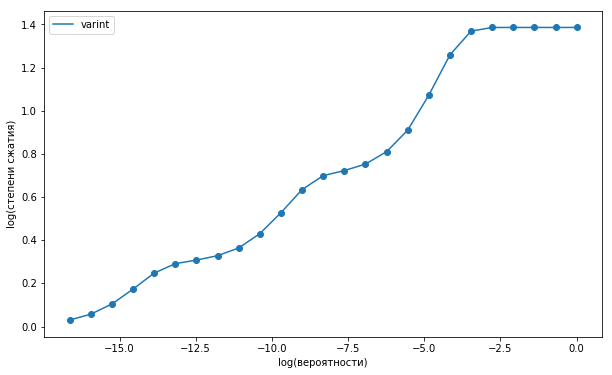

In [41]:
plt.figure(figsize=(10, 6))
plt.scatter(np.log(probs), np.log(fracs))
plt.plot(np.log(probs), np.log(fracs), label='varint')
plt.xlabel('log(вероятности)')
plt.ylabel('log(степени сжатия)')
plt.legend()